# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform a regression task and a classification task. You need to implement two classes, `DenseLayer` and `Feedforward`, and the `train` function `in implementation.py` 

In [1]:
# A bit of setup

import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloa Can't pickle local`DenseLayer` and `Feedforward`.  object 'DenseLayer.__init__.<locals>.<lambda>'ding external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%autosave 60

# TODO: please install `torchvision` into the cs137 environment if you have not done so. 
#!conda install --yes -c pytorch torchvision

Autosaving every 60 seconds


## 1. Implement the two classes and one function

<span style="color:red">**Question 1 (10 points):**</span> implement the two classes (`DenseLayer` and `Feedforward`) and the `train` function. The autograder can check the correcness of your implementation of the two classes but NOT the train function. Each of the two classes worths 3 points, and the `train` function worth 4 points. 



## 2. A toy regression problem

By this step, you should already have implemented all necessary classes and functions in `implementation.py`. In this task, we have a toy regression problem. Please check the data below and think about this question: is overfitting an issue for this problem? (This particular question has no points, but it might be useful for you to solve this problem). 


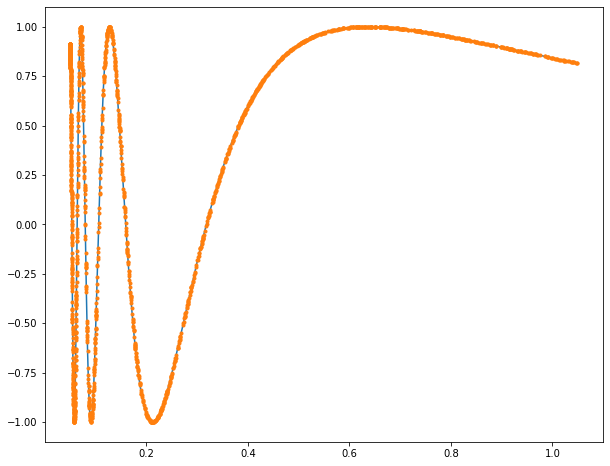

In [2]:
def target_func(x):
    y = np.sin(1 / x)
    return y

# initialize training and validation sets. 
x_train = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_train = target_func(x_train)

x_val = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_val = target_func(x_val)


# plot the function and data points
# Do you worry about overfitting problem?
sort_ind = np.argsort(x_train[:, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0], '.')


### Train the model 

<span style="color:red">**Question 2 (5 points):**</span>  Now let's run your `train` function on this data. You will need to save your model to a file and submit it. We will test your saved model. You will earn 
 * 2 points if your validation MSE is smaller than 0.1
 * 4 points if your validation MSE is smaller than 0.05
 * 5 points if your validation MSE is smaller than 0.01



In [3]:
# NOTE: neglect this cell if you are not using google colab
from google.colab import drive
import sys
drive.mount('/content/drive')

# NOTE: you need to use your own path to add the implementation to the python path 
# so you can import functions from implementation.py
sys.path.append('/content/drive/MyDrive/cs137assignments/assignment2')


Mounted at /content/drive


In [4]:
from implementation import train

depth = 3
hidden_sizes = [100, 20]
# reg_weight = 1.0
reg_weight = 0.0001
num_train_epochs = 300
batch_size = 200

model,history = train(x_train, y_train, x_val, y_val, 
                      depth=depth, 
                      hidden_sizes=hidden_sizes, 
                      reg_weight=reg_weight, 
                      num_train_epochs=num_train_epochs, 
                      task_type='regression', 
                      batch_size=batch_size, lr = 0.01)

### Plot training trace

Text(0, 0.5, 'Loss')

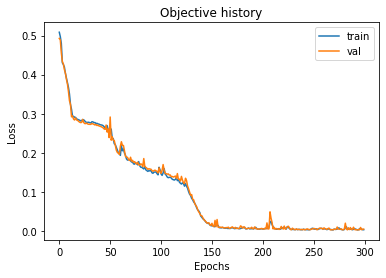

In [5]:
# Plot the loss function and train / validation accuracies

%matplotlib inline

plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='val')
plt.title('Objective history')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')


### Save the model and plot the learned function

Please save your model as follows. Make sure the saved model can be loaded correctly with `torch.load_model('sin_inv_x.sav')`. *If your model cannot be loaded, you will get zero points for this problem.*


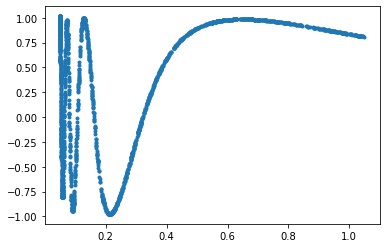

In [6]:


torch.save(model, 'sin_inv_x.sav')
model = torch.load('sin_inv_x.sav')

# need to set the model to evaluation mode
model.eval()

with torch.no_grad():
    y_pred = model(torch.tensor(x_val, dtype = torch.float32))

plt.plot(x_val[:, 0], y_pred.numpy()[:, 0], '.')

## 3. Classifying hand-written digits

This task is a classification problem on the famous MNIST dataset. 

### Load the data

In [7]:
from torchvision import datasets as dts
from torchvision.transforms import ToTensor

def transform(x):
    return ToTensor()(x).flatten()


traindt = dts.MNIST(
    root = 'data',
    train = True,                         
    transform = transform, 
    download = True,            
)
testdt = dts.MNIST(
    root = 'data', 
    train = False, 
    transform = transform
)

x_tr   = traindt.data.numpy().reshape(-1, 28 * 28)
x_test = testdt.data.numpy().reshape(-1, 28 * 28)
y_tr   = traindt.targets.numpy()
y_test = testdt.targets.numpy()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [8]:
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# separate a validation set
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, 
                                                  train_size=0.8, 
                                                  stratify=y_tr)

print('Shape of training input: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation input: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)
print('Shape of test input: ', x_test.shape)
print('Shape of test labels: ', y_test.shape)
print('Number of channels: ', np.max(y_train) + 1)

Shape of training input:  (48000, 784)
Shape of training labels:  (48000,)
Shape of validation input:  (12000, 784)
Shape of validation labels:  (12000,)
Shape of test input:  (10000, 784)
Shape of test labels:  (10000,)
Number of channels:  10


### Train a classification model


<span style="color:red">**Question 3 (10 points):**</span> train a classification model for the MNIST dataset. 

A neural network with your initial setting may not work straightforwardly, so you will need to diagnose the problems in the training procedure. One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. This task gives you a chance to gain some experience. Below, you should experiment with different values of the various hyperparameters, including 

 * the achitecture (depth, hidden layer sizes, and activation functions), 
 * optimization (optimization algorithm, learning rate, learning rate decay, batch size, and numer of training epochs)
 * regularization (regularization weight, dropout).

**Expected results**. You goal in this exercise is to get a result as good as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).  You should be aim to achieve a classification accuracy of greater than 80% on the test results.

**Grading**. You will get 
  * 5 points if your model has an accuracy over 0.75
  * 8 points if your model has an accuracy over 0.85
  * 10 points if your model has an accuracy over 0.92

In [9]:
from implementation import train
model, history = train(x_train, 
                       y_train, 
                       x_val, 
                       y_val, 
                       depth=4, 
                       hidden_sizes=[256, 128, 64], 
                       reg_weight=0.0001, 
                       num_train_epochs=60,  
                       task_type='classification',
                      lr=0.00001)

/content/drive/MyDrive/cs137assignments/assignment2/implementation.py:87: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = nn.functional.softmax(outputs)


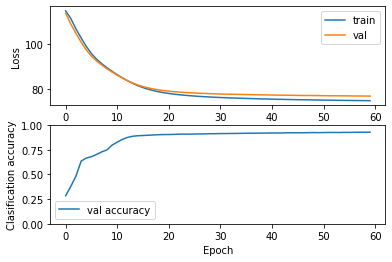

In [10]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history['accuracy'], label='val accuracy')
#plt.plot(history.history['val_accuracy'], label='val')
plt.ylim(0.0, 1.0)
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


(256, 784)
[0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256]


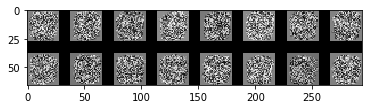

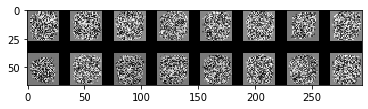

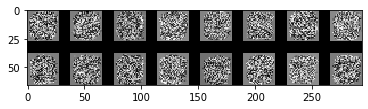

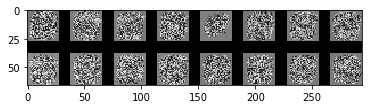

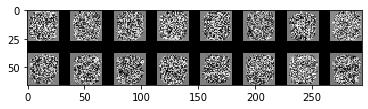

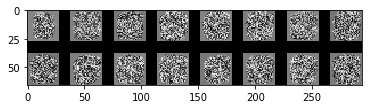

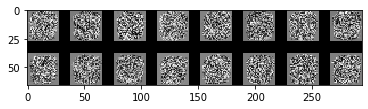

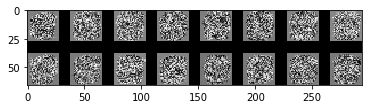

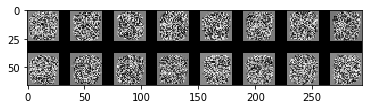

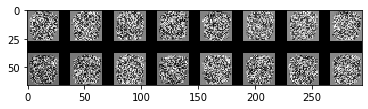

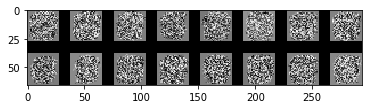

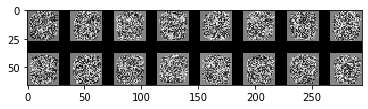

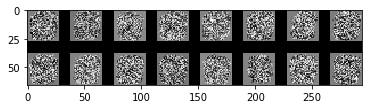

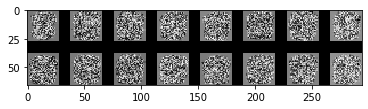

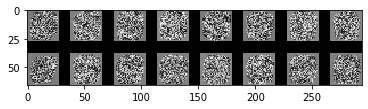

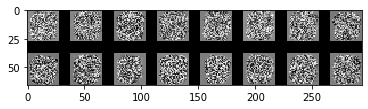

In [11]:
from vis_utils import visualize_grid

with torch.no_grad():
    W1 = model.denselayers[0].W.numpy()
W1 = W1.transpose()
print(W1.shape)
idx_list =  [16 * i for i in range(17)]
print(idx_list)
for i, idx_from in enumerate(idx_list[:-1]):
  idx_to = idx_list[i+1]
  W_plot = W1[idx_from:idx_to]
  W_plot = np.reshape(W_plot, [W_plot.shape[0], 28, 28])
  plt.imshow(visualize_grid(W_plot))
  plt.show()


**Save the model and test it**. Finally, save the model and reload it to make sure the model can be saved correctly. Test the model on the test set and show the accuracy. 

In [12]:
torch.save(model, 'mnist_cls.sav')
model = torch.load('mnist_cls.sav')

model.eval()

print(x_test.shape)
with torch.no_grad():
    y_pred = model(torch.tensor(x_test.astype(np.float32)))
    acc = np.mean(y_test == np.argmax(y_pred.numpy(), axis=1))
print('The test accuracy is ', acc)

(10000, 784)
The test accuracy is  0.934


## Question (5 points): what have you learned from this assignment? 

Please summarize your model tuning experience into three points below. If possible, please elaborate after your summarization. 

*Answer*: 
- The more complex the dataset is, the more complex the model will be. 
- Since the model benefits from more training iterations, we generally want num_batch $\times$ num_epochs to be large
- The learning rate in the second exercise is smaller because the dataset is harder to learn.

The first point and the third point go hand in hand regarding the complexity of the dataset. The dataset in the second exercise is more complex since it contains image data, as opposed to just a 2d trigonometry graph. For the trigonometry graph, there is a somewhat clear pattern that the data points follow, thus we don't need as many hidden units (in other words, a a complex model) to learn such pattern. On the other hand, for image data like MNIST, the shapes and edges of the number, represented by the pixels in the picture, contribute to the classification decision, thus we need more hidden units to learn these subtle patterns. Also for this reason, the learning rate is smaller. In exercise 1, the path of the graph is more "predicted", there are parts that follow the same direction "for a while", whereas in exercise 2, there are more little edges for different numbers, thus we need to move more slowly and explore the area more carefully in the latter case, hence smaller learning rate.

For the second point, my observation is that if the batch size is large compared to the entire dataset, resulting in very few iterations in each epoch, and we also have few num_epoch in addition to that, then the model doesn't perform well. This is because the total number of iteration is small so the algorithm has not been able to learn completely. For example, I observe that if I make the batch_size in exercise 1 to be 200, and num_epoch to be 20, the model does not perform well at all. Thus, if the number of batch is small in each epoch, then we have to increase the number of epochs to train the model effectively. In general, I aim to adjust batch_size and num_epoch simultaneouly such that the total iterations (num_batch_per_epoch $\times$ num_epoch) is large enough.